### Importing packages

In [140]:
from utils.clustering import *
import pandas as pd

from utils.preprocessing import *
from utils.plotting import *
from utils.dim_reduction import *
from utils.anomaly_detection import *

In [141]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

### Importing datasets

In [69]:
df = pd.read_csv("datasets/sensors2/finalDF.csv");
df = df.drop(['Unnamed: 0'], axis = 1)
df

,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.velRMS.x,params.velRMS.y,params.velRMS.z
0,-0.916317,-0.510802,-0.776073,-0.843561,-1.100929,-1.049107
1,-0.891811,-0.746987,-0.772921,-0.858616,-1.178136,-1.021453
2,-0.848803,-0.908806,-0.747478,-0.844066,-1.197529,-0.944238
3,-0.783893,-0.957739,-0.692927,-0.787637,-1.131285,-0.804258
4,-0.709921,-0.909944,-0.622689,-0.699573,-0.993192,-0.636181
...,...,...,...,...,...,...
3981,-0.450969,-0.359250,-0.627412,-0.609510,-0.400876,-0.671651
3982,-0.417093,-0.425560,-0.521388,-0.573228,-0.406862,-0.512732
3983,-0.517522,-0.517641,-0.499083,-0.661115,-0.540509,-0.414268
3984,-0.775653,-0.599515,-0.589230,-0.938077,-0.835770,-0.436028


Clustering the 6D data using Gaussian Mixture Model

In [70]:
gmm = GMM(df)

The model selection concerns both the covariance type and the number of components in the model. Therefore, we must specify the max number of components in order to classify each number of components and covariance type.

100%|██████████| 4/4 [00:11<00:00,  2.87s/it]


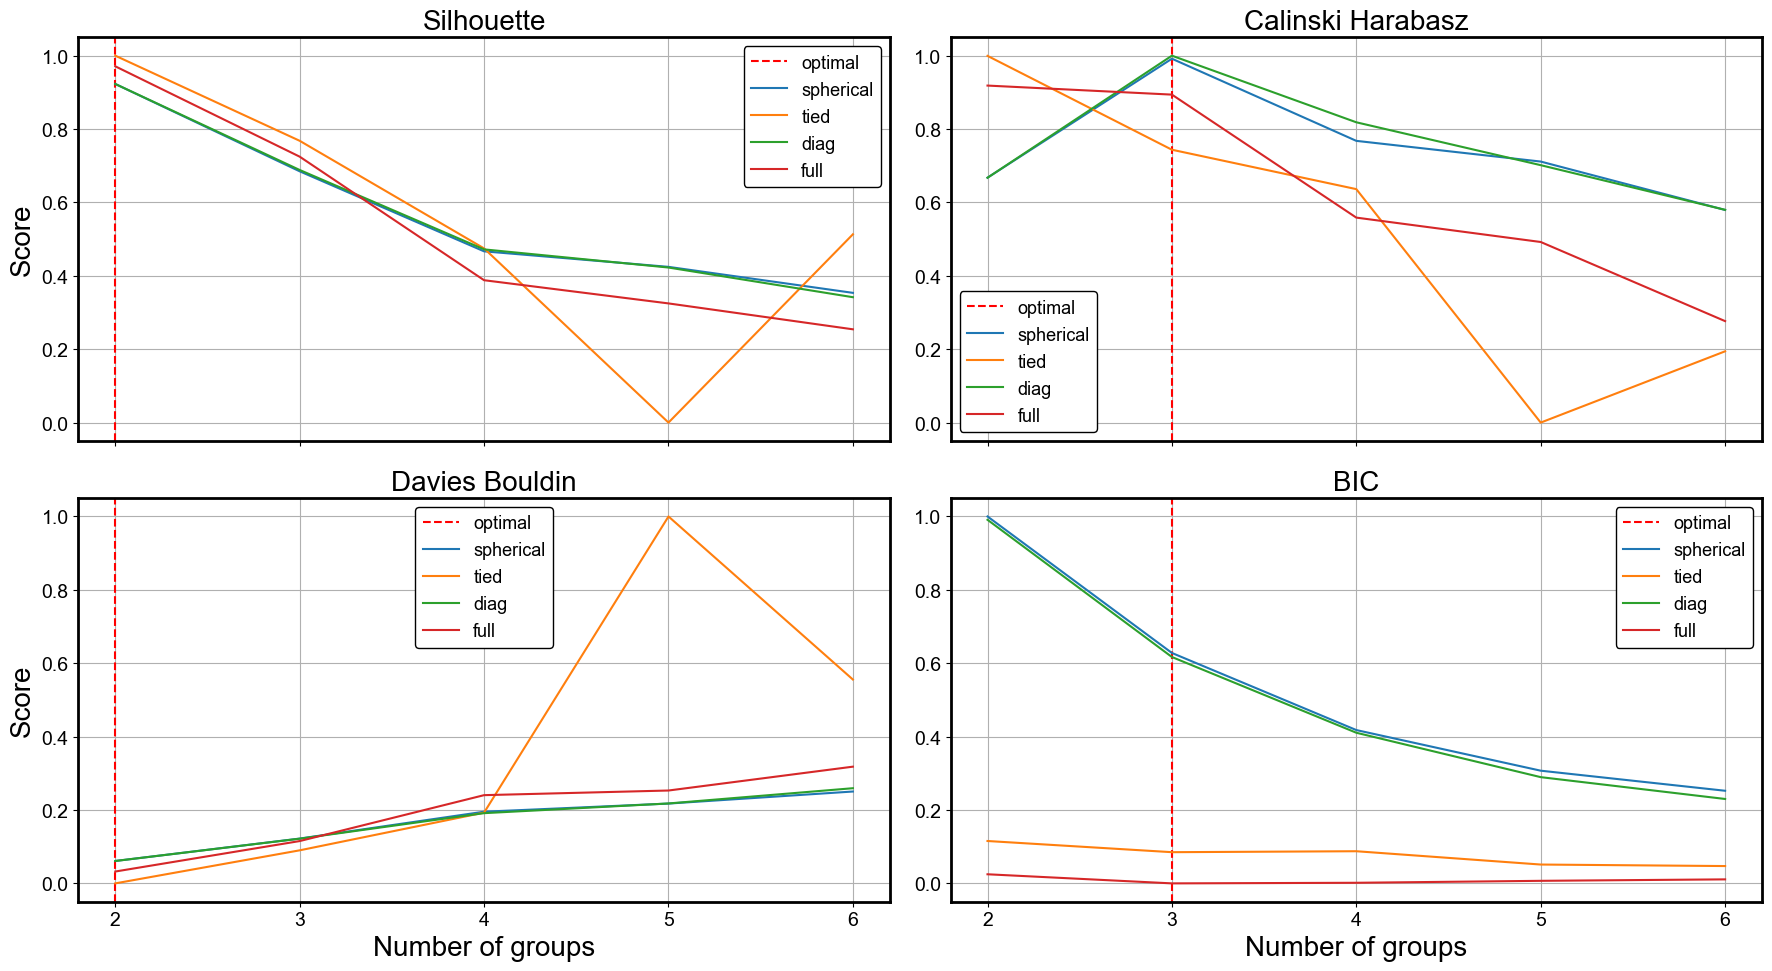

In [71]:
gmm.criterion_analysis(n_clusters=6)

In [155]:
gmm.create_model('tied', 2)
cluster_data = gmm.clustering(df, 0.6)

labels = gmm.get_labels()
labels = make_categorical(labels)

In [152]:
ts = T_SNE(n_components=2, perplexity=50, early_exaggeration=20)
ts.fit(df)

,C1,C2
0,41.494270,25.228069
1,44.250473,24.628708
2,44.969429,23.843431
3,37.860165,34.049305
4,26.377502,13.918694
...,...,...
3981,-20.512127,27.746490
3982,-18.292742,21.168016
3983,-2.283044,19.764179
3984,25.483374,33.623829


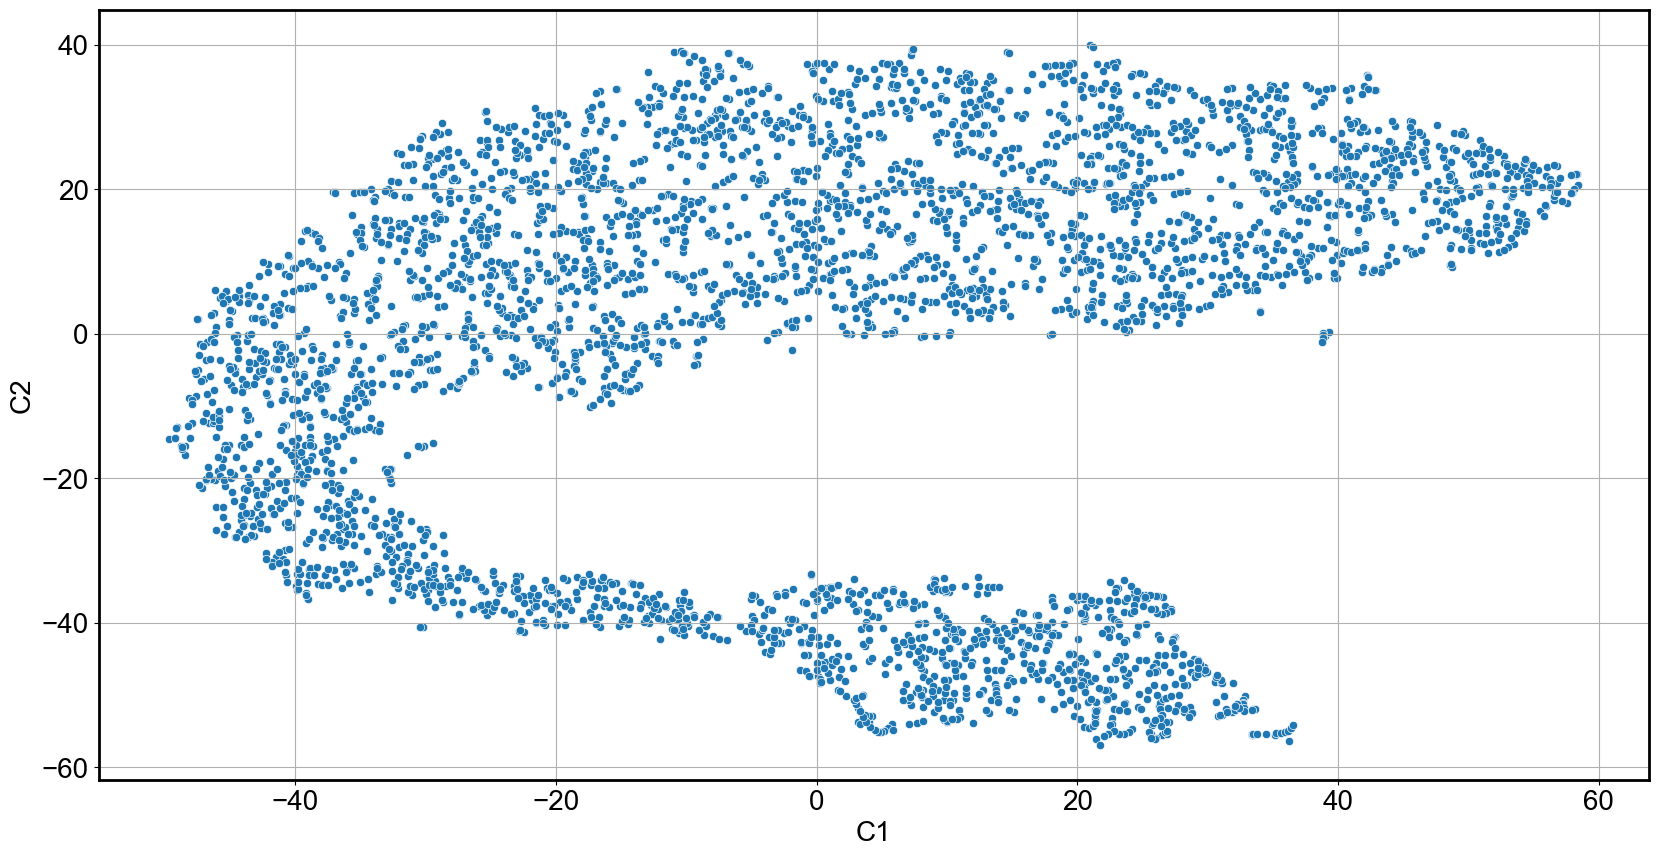

In [153]:
ts.plot()

In [156]:
tsne_data = ts.get_data()
px.scatter(data_frame=  tsne_data, x = 'C1', y = 'C2' , color= labels)

dataset with PCA applied

In [102]:
reduced_df = pd.read_csv("datasets/sensors2/reducedDF.csv")
reduced_df

,PC1,PC2
0,-2.122777,0.277135
1,-2.233705,0.206017
2,-2.241807,0.142868
3,-2.105496,0.092320
4,-1.866048,0.051282
...,...,...
3981,-1.273627,-0.011049
3982,-1.166257,0.004097
3983,-1.286239,0.089486
3984,-1.705114,0.292003


### Creating and intializing the Gaussian Mixture Model class

In [114]:
gmm2 = GMM(df)
df

,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.velRMS.x,params.velRMS.y,params.velRMS.z
0,-0.916317,-0.510802,-0.776073,-0.843561,-1.100929,-1.049107
1,-0.891811,-0.746987,-0.772921,-0.858616,-1.178136,-1.021453
2,-0.848803,-0.908806,-0.747478,-0.844066,-1.197529,-0.944238
3,-0.783893,-0.957739,-0.692927,-0.787637,-1.131285,-0.804258
4,-0.709921,-0.909944,-0.622689,-0.699573,-0.993192,-0.636181
...,...,...,...,...,...,...
3981,-0.450969,-0.359250,-0.627412,-0.609510,-0.400876,-0.671651
3982,-0.417093,-0.425560,-0.521388,-0.573228,-0.406862,-0.512732
3983,-0.517522,-0.517641,-0.499083,-0.661115,-0.540509,-0.414268
3984,-0.775653,-0.599515,-0.589230,-0.938077,-0.835770,-0.436028


In [157]:
gmm2.create_model("tied", n_clusters=2)

### Now we can use the clustering method which predicts the data of a given dataframe. The method returns a new dataframe, containing the group and score for each data point.

In [158]:
gmm2.clustering(df,prob_threshold=0.6)
labels2 = gmm2.get_labels()
labels2 = make_categorical(labels2)

### Since we have a 2D dataframe, we plot the distribuition using the 'cluster' column

In [159]:
px.scatter(data_frame=reduced_df, x = 'PC1', y = 'PC2', color = labels2)

Clustering the PCA dataset

In [160]:
gmm3 = GMM(reduced_df)
gmm3.create_model(cv_type = 'tied', n_clusters=2)
distribution = gmm3.clustering(reduced_df, prob_threshold=0.7)
labels = list(distribution['cluster'])
distribution['cluster'] = make_categorical(labels)

px.scatter(data_frame = distribution, x = 'PC1', y = 'PC2', color = 'cluster')

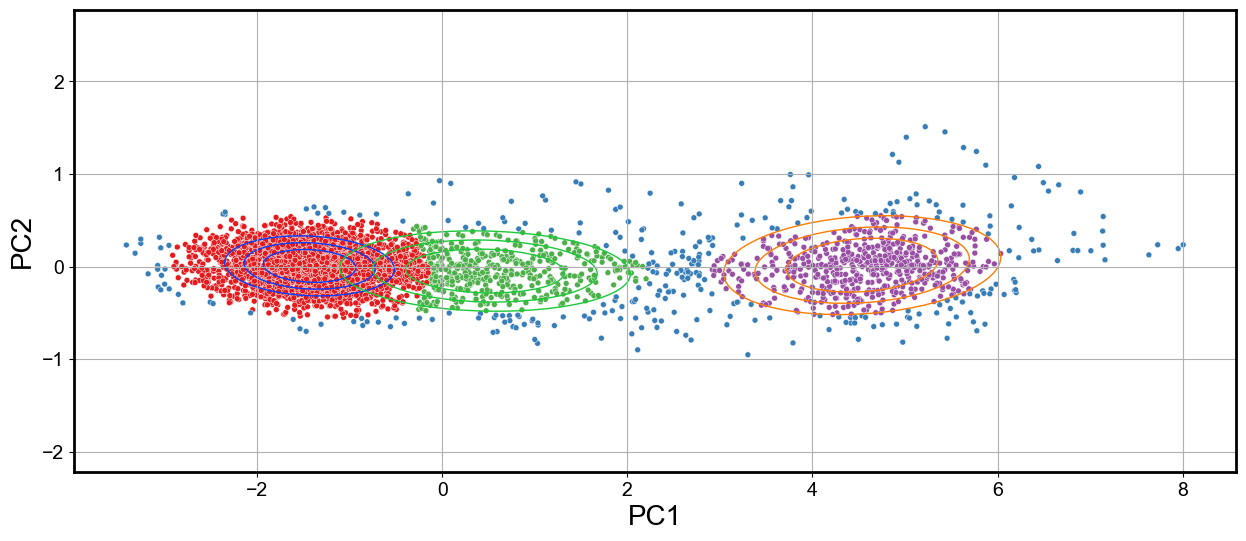

In [126]:
ax = sns.scatterplot(data=distribution, x='PC1', y='PC2', size = 1, hue = 'cluster', palette='Set1', legend = False)
gmm3.make_ellipses(ax)
plt.show()

We can also plot the score distribution using the 'scores' column

In [149]:
px.scatter(data_frame = distribution, x = 'PC1', y = 'PC2', color = 'scores')

As we can see, the yellow or dense points, are concentrated in the middle of the clusters, and the farther we go from the denser regions, the color scale changes to blue. Therefore, we can use this information to classify outliers.
